In [31]:
import glob
import numpy as np
from scipy.io import loadmat

import seaborn as sns
import matplotlib.pylab as plt

## Olivers

### Input images

In [32]:
def corrupt(X_in,corNum=10):
    X = X_in.copy()
    N,p = X.shape[0],X.shape[1]
    for i in range(N):
        loclist = np.random.randint(0, p, size = corNum)
        for j in loclist:
            if X[i,j] > 0.5:
                X[i,j] = 0
            else:
                X[i,j] = 1
    return X

In [33]:
face_olv = loadmat('./input/olivettifaces.mat')
x_train_olv = face_olv['faces'].T/255.

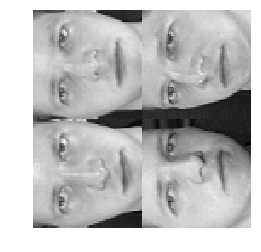

In [34]:
noise_factors = [0.0]
for noise_factor in noise_factors:
    x_train_noisy = corrupt(x_train_olv, corNum = int(noise_factor*64*64))

    h = w = 64
    # plot of generation
    n = np.sqrt(8).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(64,64)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
#     plt.title("Raw Fashion MNIST with "+str(int(noise_factor*100))+"% Noise")
#     plt.savefig("./pic/raw_fm_n49")
    plt.show()

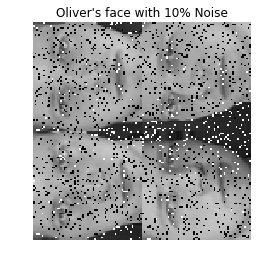

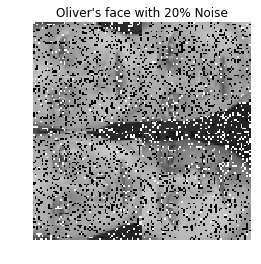

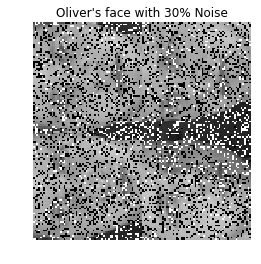

In [35]:
noise_factors = [0.1,0.2,0.3]
for noise_factor in noise_factors:
    x_train_noisy = corrupt(x_train_olv, corNum = int(noise_factor*64*64))

    h = w = 64
    # plot of generation
    n = np.sqrt(8).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(64,64)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title("Oliver's face with "+str(int(noise_factor*100))+"% Noise")
#     plt.savefig("./pic/raw_fm_n49")
    plt.show()

### Fid

In [36]:
rvae_olv_fid_scores = np.load("fid_scores_rvae_face_olv.npy")
rvae_olv_fid_scores.shape

(3, 3)

In [37]:
for i in range(len(rvae_olv_fid_scores)):
    print(i)
    print(rvae_olv_fid_scores[i].mean())

0
300.636447496
1
301.166688407
2
304.201384441


In [38]:
vae_olv_fid_scores = np.load("fid_scores_vae_olv.npy")
vae_olv_fid_scores.shape

(3,)

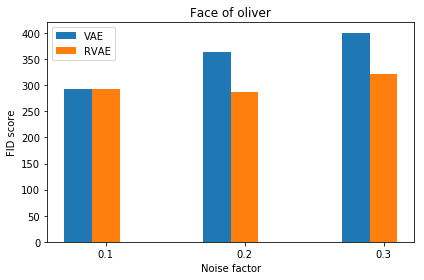

In [39]:
noise_factors = [0.1,0.2,0.3]
# create plot
fig, ax = plt.subplots()
index = np.arange(len(noise_factors))
bar_width = 0.2
opacity = 1
 
rects1 = plt.bar(index, vae_olv_fid_scores, bar_width,
                 alpha=opacity, label='VAE')
 
rects2 = plt.bar(index + bar_width, rvae_olv_fid_scores[0], bar_width,
                 alpha=opacity, label='RVAE')

 
plt.xlabel('Noise factor')
plt.ylabel('FID score')
plt.title('Face of oliver')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()

### Generation

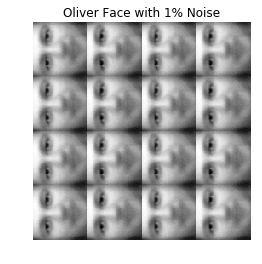

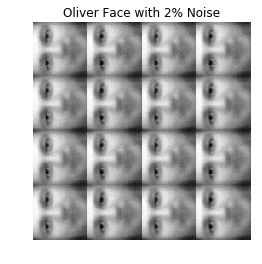

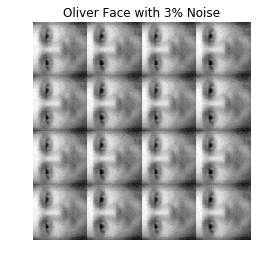

In [40]:
noise_factors = ["1","2","3"]
for noise in noise_factors:
    a = np.load("./rvae_face_olv/lambda_50/noise_0."+noise+"/generation_fid.npy")
    x_train_noisy = a[70:1000]

    h = w = 64
    # plot of generation
    n = np.sqrt(16).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(64, 64)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title("Oliver Face with "+str(int(noise))+"% Noise")
#     plt.savefig("../sp_pic/rvae_n"+noise+"_l50")
    plt.show()

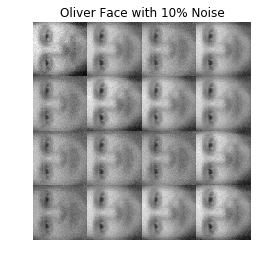

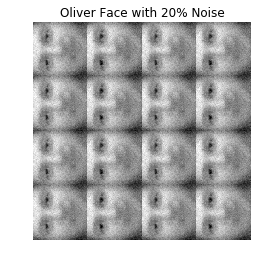

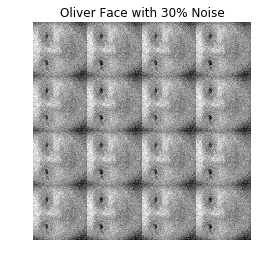

In [41]:
noise_factors = ["1","2","3"]
for noise in noise_factors:
    a = np.load("vae_face_olv/0."+noise+"/generation_fid.npy")
    x_train_noisy = a[70:1000]

    h = w = 64
    # plot of generation
    n = np.sqrt(16).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(64, 64)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title("Oliver Face with "+str(int(noise)*10)+"% Noise")
#     plt.savefig("../sp_pic/rvae_n"+noise+"_l50")
    plt.show()

## FF

### Input images

In [12]:
face_ff = loadmat('./input/frey_rawface.mat')
x_train_ff = face_ff['ff'].T/255.

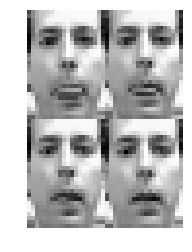

In [13]:
noise_factors = [0.0]
for noise_factor in noise_factors:
    x_train_noisy = corrupt(x_train_ff, corNum = int(noise_factor*28*20))

    h = 28
    w = 20
    # plot of generation
    n = np.sqrt(8).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(28,20)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
#     plt.title("Raw Fashion MNIST with "+str(int(noise_factor*100))+"% Noise")
#     plt.savefig("./pic/raw_fm_n49")
    plt.show()

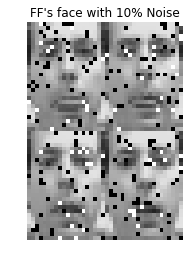

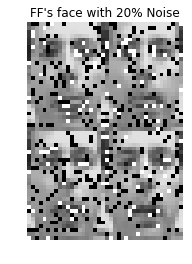

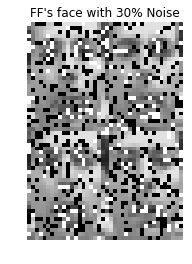

In [27]:
noise_factors = [0.1,0.2,0.3]
for noise_factor in noise_factors:
    x_train_noisy = corrupt(x_train_ff, corNum = int(noise_factor*28*20))

    h = 28
    w = 20
    # plot of generation
    n = np.sqrt(8).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(28,20)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title("FF's face with "+str(int(noise_factor*100))+"% Noise")
#     plt.savefig("./pic/raw_fm_n49")
    plt.show()

### FID

In [15]:
rvae_ff_fid_scores = np.load("fid_scores_rvae_face_ff.npy")
rvae_ff_fid_scores.shape

(3, 3)

In [16]:
for i in range(len(rvae_ff_fid_scores)):
    print(i)
    print(rvae_ff_fid_scores[i].mean())

0
352.667607744
1
357.97439753
2
363.799916951


In [17]:
vae_ff_fid_scores = np.load("fid_scores_vae_ff.npy")
vae_ff_fid_scores.shape

(3,)

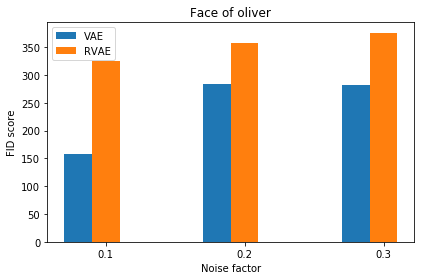

In [18]:
noise_factors = [0.1,0.2,0.3]
# create plot
fig, ax = plt.subplots()
index = np.arange(len(noise_factors))
bar_width = 0.2
opacity = 1
 
rects1 = plt.bar(index, vae_ff_fid_scores, bar_width,
                 alpha=opacity, label='VAE')
 
rects2 = plt.bar(index + bar_width, rvae_ff_fid_scores[0], bar_width,
                 alpha=opacity, label='RVAE')

 
plt.xlabel('Noise factor')
plt.ylabel('FID score')
plt.title('Face of oliver')
plt.xticks(index + bar_width, noise_factors)
plt.legend()
 
plt.tight_layout()
# plt.savefig("../gs_pic/gs_vae_rvae_bar.png")
plt.show()

### Generation

#### RVAE's

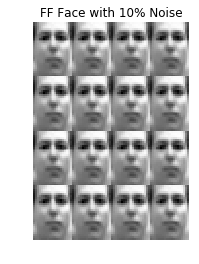

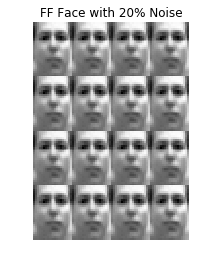

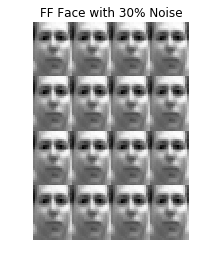

In [42]:
noise_factors = ["1","2","3"]
for noise in noise_factors:
    a = np.load("./rvae_face_ff/lambda_50/noise_0."+noise+"/generation_fid.npy")
    x_train_noisy = a[70:1000]

    h = 28
    w = 20
    # plot of generation
    n = np.sqrt(16).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(28, 20)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title("FF Face with "+str(int(noise)*10)+"% Noise")
#     plt.savefig("../sp_pic/rvae_n"+noise+"_l50")
    plt.show()

#### VAE's

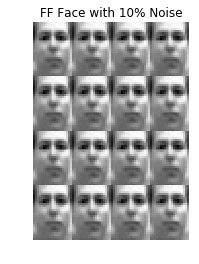

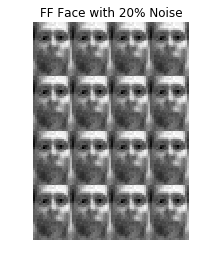

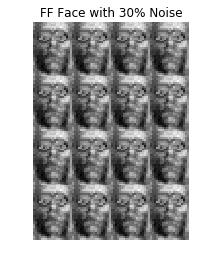

In [43]:
noise_factors = ["1","2","3"]
for noise in noise_factors:
    a = np.load("vae_face_ff/0."+noise+"/generation_fid.npy")
    x_train_noisy = a[70:1000]

    h = 28
    w = 20
    # plot of generation
    n = np.sqrt(16).astype(np.int32)
    I_generated = np.empty((h*n, w*n))
    for i in range(n):
        for j in range(n):
            I_generated[i*h:(i+1)*h, j*w:(j+1)*w] = x_train_noisy[i*n+j, :].reshape(28, 20)

    plt.figure(figsize=(4, 4))
    plt.imshow(I_generated, cmap='gray')
    plt.axis('off')
    plt.title("FF Face with "+str(int(noise)*10)+"% Noise")
#     plt.savefig("../sp_pic/rvae_n"+noise+"_l50")
    plt.show()